# GEA1000 Tutorial 4
Done By: Joel Quek

## Part 2: Sampling distributions of the sample proportion are approximately normal

Part 1 is not missing. I excluded it from this notebook because it can be completed using Excel.

Recall that in Part 1, the Overall Population Proportion for *Xanthostemon chrysanthus* is $0.3$

We have the luxury of knowing this value of P beforehand

$p = 0.3$ is very important for this question

---

#### What is the point of this question?

To Show that we can go from this:

More generally, given a population proportion p, there is about 95% chance that the sample proportion p* of a random sample of size n lies within the interval $p ± 1.96*\sqrt{\frac{p(1-p)}{n}}$. 

To This:

Given 10000 random samples of size 200 each, 95% of the confidence intervals contain the population proportion p.

Which means we are 95% **confident** that $p^* ± 1.96*\sqrt{\frac{p^*(1-p^*)}{n}}$ contains the population proportion p.

---

### Open CSV as a Data Frame

Note: To run this notebook you must have the *trees.csv* file in the same root folder

In [2]:
trees <- read.csv("trees.csv", header=TRUE)

In [3]:
head(trees)

,tree_id,species_id,species_name,common_name,girth,height,age,geometry
,<dbl>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,1999.001,1907,Xanthostemon chrysanthus,Golden Myrtle,0.6,6,18,POINT (103.744379 1.38631)
2,2009.013,1873,Syzygium zeylanicum,Gelam Tikus,0.4,6,8,POINT (103.823069 1.318688)
3,2008.003,1848,Sterculia parviflora,Kelumpang Burong,1.0,9,10,POINT (103.800919 1.429295)
4,2000.004,1907,Xanthostemon chrysanthus,Golden Myrtle,1.5,18,18,POINT (103.794618 1.332331)
5,1997.341,1857,Swietenia macrophylla,American Mahogany,2.5,12,18,POINT (103.928155 1.309291)
6,2005.016,1907,Xanthostemon chrysanthus,Golden Myrtle,1.2,15,15,POINT (103.844473 1.376908)


In [4]:
summary(trees)

    tree_id       species_id    species_name       common_name       
 Min.   :1997   Min.   :  170   Length:20000       Length:20000      
 1st Qu.:1997   1st Qu.: 1649   Class :character   Class :character  
 Median :2004   Median : 1813   Mode  :character   Mode  :character  
 Mean   :2003   Mean   : 2330                                        
 3rd Qu.:2007   3rd Qu.: 1907                                        
 Max.   :2018   Max.   :32842                                        
     girth            height           age           geometry        
 Min.   : 0.100   Min.   : 3.00   Min.   :  0.00   Length:20000      
 1st Qu.: 0.600   1st Qu.: 6.00   1st Qu.: 11.00   Class :character  
 Median : 0.800   Median : 9.00   Median : 14.00   Mode  :character  
 Mean   : 1.005   Mean   :10.05   Mean   : 13.95                     
 3rd Qu.: 1.300   3rd Qu.:12.00   3rd Qu.: 17.00                     
 Max.   :36.000   Max.   :24.00   Max.   :200.00                     

## Question 5

### Instantiate Variables

In [6]:
arr_prop = numeric(10000) # Array of Proportions: Array of 10000 zeroes. The zeroes are arbitrary values.
pp_in_CI = logical(10000) # Array of 10000 FALSE Values. The FALSE Values are arbitrary.

sd_sd = sqrt((0.3*0.7)/200) # square root of p(1-p)/n. This is ARBITRARY. To give a value to the sd_sd
# Why is p=0.3 chosen? Because the values we got for p were around 0.27 to 0.29. Refer to part 1.
# And the variance when approximating to a Normal Distribution is p(1-p)/N. Hence we take squareroot for sd.
left_end = 0.3-(1.96*sd_sd) # left bound of 95% of the Normal Distribution
right_end = 0.3+(1.96*sd_sd) # Right bound of 95% of the Normal Distribution

prop_in = 0 # This is a COUNT variable. Denoting if the proportion is within 95% of the Normal Distribution.

### Plot 1

In [7]:
for (i in 1:10000) { # Performing the same code 10000 times
    s = sample(trees[,"species_name"], 200) # random samples of size 200 from the trees dataframe
    number = sum(s == "Xanthostemon chrysanthus") # count the number of the specific flower
    arr_prop[i] = (number/200) # populate the arr_prop array with the proportions of the specific flower
    
    # This portion of the code relates to the Approximated Normal Distribution generated by the FULL Dataset
    if (arr_prop[i] >= left_end & arr_prop[i] <= right_end) { 
    # if the Sample proportion is between left and right bounds. ie it is within 95% of the Normal Distribution
    prop_in = prop_in + 1 
    # then add 1 to the COUNT
    # prop_in is basically the count of whether the sample proportion in IN or WITHIN the 95% of Normal Distribution
    } 
    
    # This portion of the code relates to the CIs created by EACH of the 10000 samples
    # The next line of code means that the absolute difference between the 
    # Sample proportion (p*) and the Population proportion (p) is less than
    # the error term of the Sample CI
    # Which means this line of code finds the samples 
    # where the population proportion is WITHIN the sample CI
    if (abs(arr_prop[i]-0.3) <= 1.96*sqrt((arr_prop[i]*(1-arr_prop[i]))/200)) { 
        # if array proportion minus 0.3 is less than 1.96*Sqrt((p)(1-p)/n)
        pp_in_CI[i] = TRUE #this just says that the population proportion is within the CI.
        # We want to find out what percentage of these sample CIs contain the pupulation proportion
    } 
} 

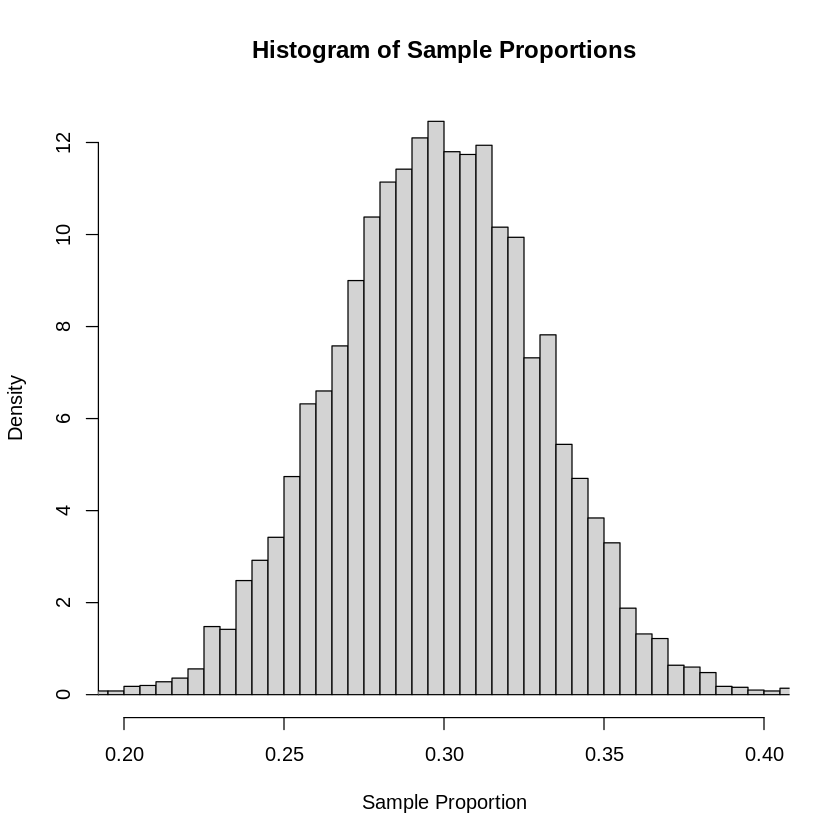

In [8]:
hist(arr_prop,  # arr_prop is the choice for the plot
    main = "Histogram of Sample Proportions", # Title
    xlab = "Sample Proportion",  # X Label
    xlim = c(0.2, 0.4),  # X-axis bounds/limits
    breaks = seq(min(arr_prop), max(arr_prop), length.out = ((max(arr_prop)-min(arr_prop))*200)+1), 
    # number of breaks/bins
    freq=FALSE) 

### IMPORTANT: Area of each bar is the % of samples out of the 10000 random samples.

### Plot 2

Plotting twice is not necessary, but to show that two plots will look different from each other.

In [9]:
for (i in 1:10000) { # Performing the same code 10000 times
    s = sample(trees[,"species_name"], 200) # random samples of size 200 from the trees dataframe
    number = sum(s == "Xanthostemon chrysanthus") # count the number of the specific flower
    arr_prop[i] = (number/200) # populate the arr_prop array with the proportions of the specific flower
    
    # This portion of the code relates to the Approximated Normal Distribution generated by the FULL Dataset
    if (arr_prop[i] >= left_end & arr_prop[i] <= right_end) { 
    # if the Sample proportion is between left and right bounds. ie it is within 95% of the Normal Distribution
    prop_in = prop_in + 1 
    # then add 1 to the COUNT
    # prop_in is basically the count of whether the sample proportion in IN or WITHIN the 95% of Normal Distribution
    } 
    
    # This portion of the code relates to the CIs created by EACH of the 10000 samples
    # The next line of code means that the absolute difference between the 
    # Sample proportion (p*) and the Population proportion (p) is less than
    # the error term of the Sample CI
    # Which means this line of code finds the samples 
    # where the population proportion is WITHIN the sample CI
    if (abs(arr_prop[i]-0.3) <= 1.96*sqrt((arr_prop[i]*(1-arr_prop[i]))/200)) { 
        # if array proportion minus 0.3 is less than 1.96*Sqrt((p)(1-p)/n)
        pp_in_CI[i] = TRUE #this just says that the population proportion is within the CI.
        # We want to find out what percentage of these sample CIs contain the pupulation proportion
    } 
} 

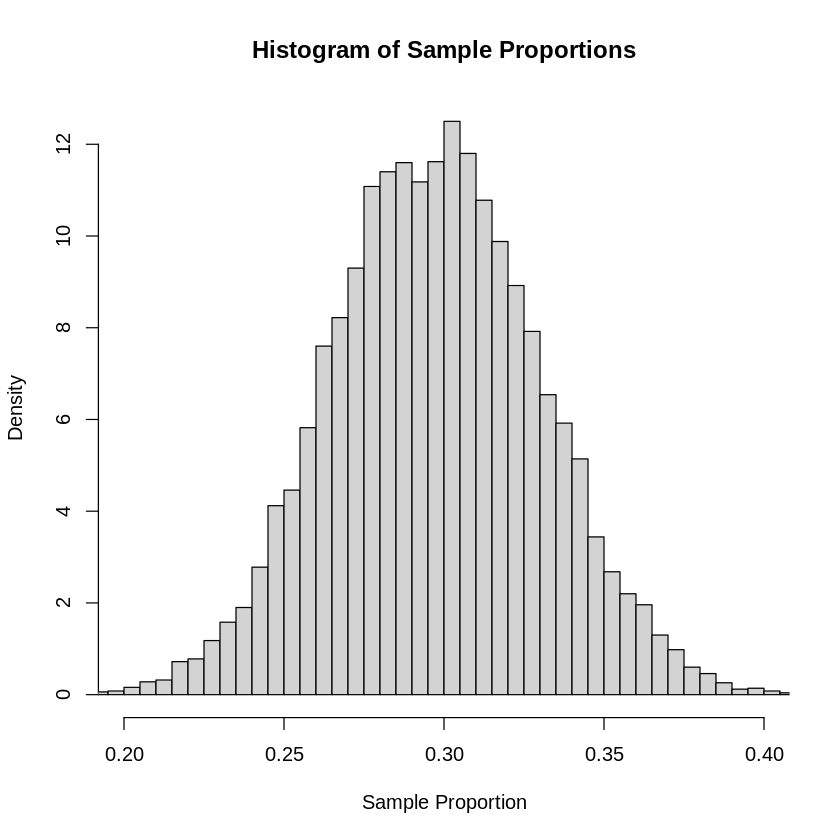

In [10]:
hist(arr_prop,  # arr_prop is the choice for the plot
    main = "Histogram of Sample Proportions", # Title
    xlab = "Sample Proportion",  # X Label
    xlim = c(0.2, 0.4),  # X-axis bounds/limits
    breaks = seq(min(arr_prop), max(arr_prop), length.out = ((max(arr_prop)-min(arr_prop))*200)+1),  
     # number of breaks/bins
    freq=FALSE) 

### Q-Q Plots (Not in Syllabus)

How do you know if a distribution is Normally Distributed?

"It looks symmetrical" will not cut it

Use a Q-Q Plot (or a Quantile-Quantile Plot

Stat Quest: https://www.youtube.com/watch?v=okjYjClSjOg

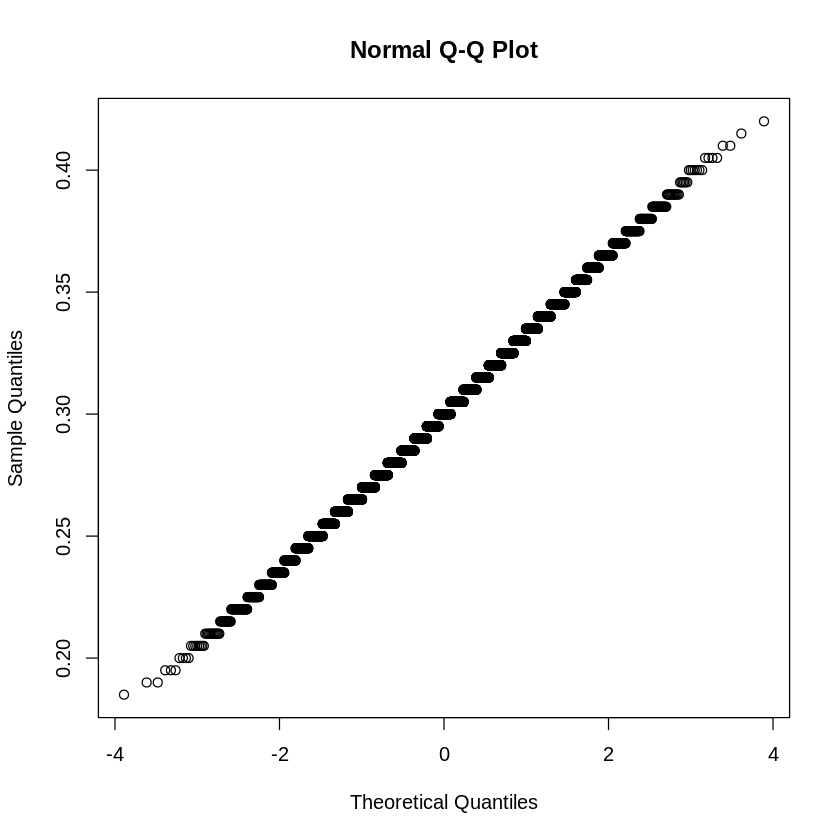

In [11]:
qqnorm(arr_prop)

### Question 7

In the editor, append the following to the code in Step 5.


In [ ]:
for (i in 1:10000) { # Performing the same code 10000 times
    s = sample(trees[,"species_name"], 200) # random samples of size 200 from the trees dataframe
    number = sum(s == "Xanthostemon chrysanthus") # count the number of the specific flower
    arr_prop[i] = (number/200) # populate the arr_prop array with the proportions of the specific flower
    
    # This portion of the code relates to the Approximated Normal Distribution generated by the FULL Dataset
    if (arr_prop[i] >= left_end & arr_prop[i] <= right_end) { 
    # if the Sample proportion is between left and right bounds. ie it is within 95% of the Normal Distribution
    prop_in = prop_in + 1 
    # then add 1 to the COUNT
    # prop_in is basically the count of whether the sample proportion in IN or WITHIN the 95% of Normal Distribution
    } 
    
    # This portion of the code relates to the CIs created by EACH of the 10000 samples
    # The next line of code means that the absolute difference between the 
    # Sample proportion (p*) and the Population proportion (p) is less than
    # the error term of the Sample CI
    # Which means this line of code finds the samples 
    # where the population proportion is WITHIN the sample CI
    if (abs(arr_prop[i]-0.3) <= 1.96*sqrt((arr_prop[i]*(1-arr_prop[i]))/200)) { 
        # if array proportion minus 0.3 is less than 1.96*Sqrt((p)(1-p)/n)
        pp_in_CI[i] = TRUE #this just says that the population proportion is within the CI.
        # We want to find out what percentage of these sample CIs contain the pupulation proportion
    } 
} 

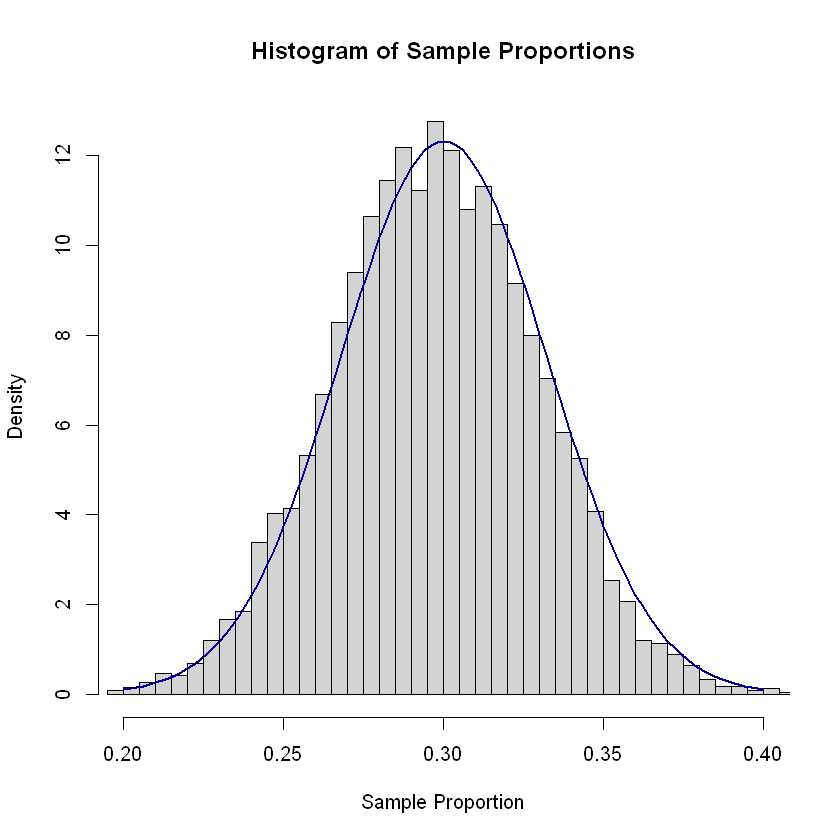

In [ ]:
hist(arr_prop,  # arr_prop is the choice for the plot
    main = "Histogram of Sample Proportions", # Title
    xlab = "Sample Proportion",  # X Label
    xlim = c(0.2, 0.4),  # X-axis bounds/limits
    breaks = seq(min(arr_prop), max(arr_prop), length.out = ((max(arr_prop)-min(arr_prop))*200)+1),  
     # number of breaks/bins
    freq=FALSE) 

# The appended code just adds a Normal Curve onto the original Density Plot
curve(dnorm(x, mean=0.3, sd=sd_sd),
           col="darkblue",
           lwd=2,
           add=TRUE)

How do we know which normal distribution to use in approximating a sampling distribution of the sample proportion? 

It is known that the said sampling distribution tends towards the 

**Normal Distribution** with mean $p$ and variance $\frac{p(1-p)}{n}$, 

where p is the population proportion and n is the sample size. 



---

## Part 3: Confidence intervals for POPULATION PROPORTIONS


In the editor, append the following to the code resulting from Step 7. 

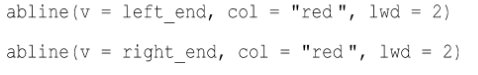

In [ ]:
for (i in 1:10000) { # Performing the same code 10000 times
    s = sample(trees[,"species_name"], 200) # random samples of size 200 from the trees dataframe
    number = sum(s == "Xanthostemon chrysanthus") # count the number of the specific flower
    arr_prop[i] = (number/200) # populate the arr_prop array with the proportions of the specific flower
    
    # This portion of the code relates to the Approximated Normal Distribution generated by the FULL Dataset
    if (arr_prop[i] >= left_end & arr_prop[i] <= right_end) { 
    # if the Sample proportion is between left and right bounds. ie it is within 95% of the Normal Distribution
    prop_in = prop_in + 1 
    # then add 1 to the COUNT
    # prop_in is basically the count of whether the sample proportion in IN or WITHIN the 95% of Normal Distribution
    } 
    
    # This portion of the code relates to the CIs created by EACH of the 10000 samples
    # The next line of code means that the absolute difference between the 
    # Sample proportion (p*) and the Population proportion (p) is less than
    # the error term of the Sample CI
    # Which means this line of code finds the samples 
    # where the population proportion is WITHIN the sample CI
    if (abs(arr_prop[i]-0.3) <= 1.96*sqrt((arr_prop[i]*(1-arr_prop[i]))/200)) { 
        # if array proportion minus 0.3 is less than 1.96*Sqrt((p)(1-p)/n)
        pp_in_CI[i] = TRUE #this just says that the population proportion is within the CI.
        # We want to find out what percentage of these sample CIs contain the pupulation proportion
    } 
} 

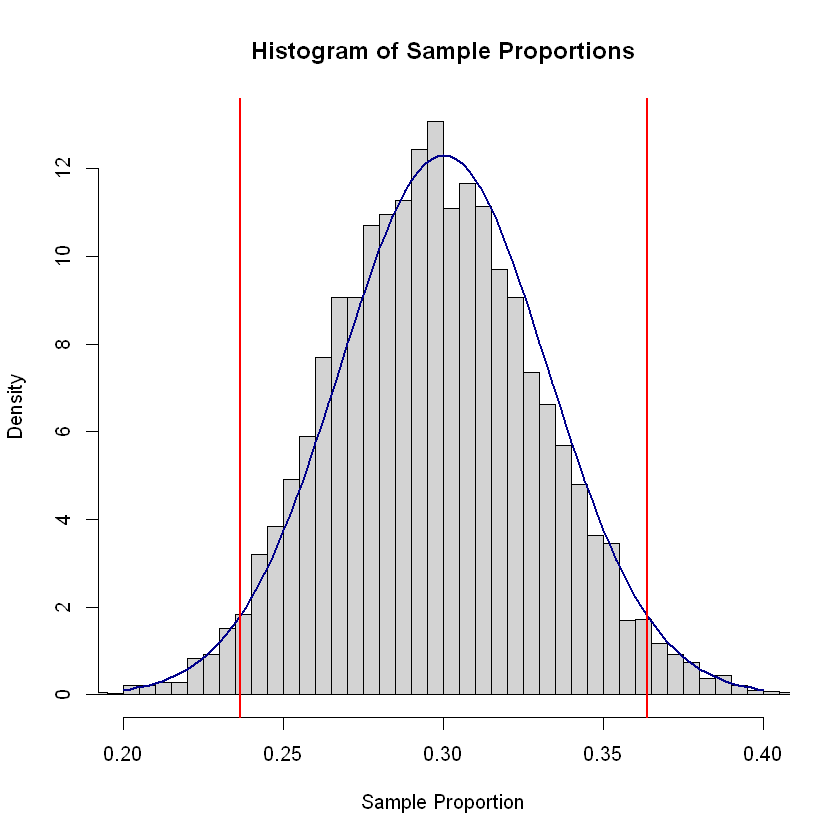

In [ ]:
hist(arr_prop,  # arr_prop is the choice for the plot
    main = "Histogram of Sample Proportions", # Title
    xlab = "Sample Proportion",  # X Label
    xlim = c(0.2, 0.4),  # X-axis bounds/limits
    breaks = seq(min(arr_prop), max(arr_prop), length.out = ((max(arr_prop)-min(arr_prop))*200)+1),  
     # number of breaks/bins
    freq=FALSE) 

# The appended code just adds a Normal Curve onto the original Density Plot
curve(dnorm(x, mean=0.3, sd=sd_sd),
           col="darkblue",
           lwd=2,
           add=TRUE)

# The new appended code just adds two vertical lines showing the boundaries
abline(v=left_end, col='red',lwd=2)

abline(v=right_end,col='red',lwd=2)

(a) It is known that the area under any normal density curve, within **1.96 standard deviations from its mean**, is approximately 0.95. In the plot you have generated, what is the estimated area of the histogram between the vertical lines?

Extra Reading: https://onlinestatbook.com/2/estimation/mean.html#:~:text=The%20value%20of%201.96%20is,standard%20error%20of%20the%20mean.

Answer: As the density curve plotted is of the normal distribution $N(0.3,\frac{0.3(0.7)}{200})$, 

the two vertical lines are 1.96 standard deviations away from its mean. Therefore, the area under the curve between the two vertical lines is approximately 0.95. 

That the area under the curve is almost equal to the area of the histogram between the lines, then gives us 0.95 as the estimated area in question.

[Not in Syllabus] Calculation of Area Under Curve (AUC) for Normal Distribution with mean= 0.3 and sd =  $\sqrt{\frac{0.3*0.7}{200}}$

In [ ]:
pnorm(right_end,mean=0.3,sd=sd_sd)-pnorm(left_end,mean=0.3,sd=sd_sd)

[1] 0.9500042

---

### Questions 11 and 12

Since we know the area UNDER every density histogram equals 1, we can infer that about 95% of (the area of) the histogram lies between the vertical lines. 


This is akin to saying, about **95% of the sample proportions** of Xanthostemon chrysanthus lie within the interval $0.3±1.96*\sqrt{\frac{0.3(0.7)}{200}}$.


We can verify this further via a simple calculation. 


In [ ]:
# I need to restart the prop_in count from ZERO (Not required to know why)
prop_in = 0

In [ ]:
for (i in 1:10000) { # Performing the same code 10000 times
    s = sample(trees[,"species_name"], 200) # random samples of size 200 from the trees dataframe
    number = sum(s == "Xanthostemon chrysanthus") # count the number of the specific flower
    arr_prop[i] = (number/200) # populate the arr_prop array with the proportions of the specific flower
    
    # This portion of the code relates to the Approximated Normal Distribution generated by the FULL Dataset
    if (arr_prop[i] >= left_end & arr_prop[i] <= right_end) { 
    # if the Sample proportion is between left and right bounds. ie it is within 95% of the Normal Distribution
    prop_in = prop_in + 1 
    # then add 1 to the COUNT
    # prop_in is basically the count of whether the sample proportion in IN or WITHIN the 95% of Normal Distribution
    } 
    
    # This portion of the code relates to the CIs created by EACH of the 10000 samples
    # The next line of code means that the absolute difference between the 
    # Sample proportion (p*) and the Population proportion (p) is less than
    # the error term of the Sample CI
    # Which means this line of code finds the samples 
    # where the population proportion is WITHIN the sample CI
    if (abs(arr_prop[i]-0.3) <= 1.96*sqrt((arr_prop[i]*(1-arr_prop[i]))/200)) { 
        # if array proportion minus 0.3 is less than 1.96*Sqrt((p)(1-p)/n)
        pp_in_CI[i] = TRUE #this just says that the population proportion is within the CI.
        # We want to find out what percentage of these sample CIs contain the pupulation proportion
    } 
} 

[1] Proportion of sample proportions within the given interval =  0.9462


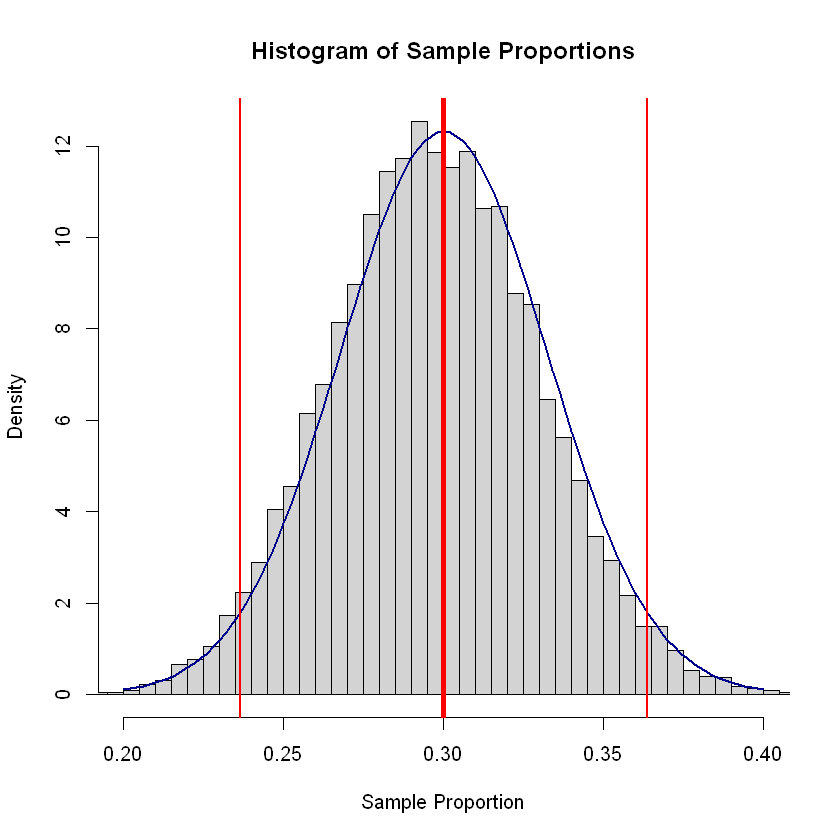

In [ ]:
hist(arr_prop,  # arr_prop is the choice for the plot
    main = "Histogram of Sample Proportions", # Title
    xlab = "Sample Proportion",  # X Label
    xlim = c(0.2, 0.4),  # X-axis bounds/limits
    breaks = seq(min(arr_prop), max(arr_prop), length.out = ((max(arr_prop)-min(arr_prop))*200)+1),  
     # number of breaks/bins
    freq=FALSE) 

# The appended code just adds a Normal Curve onto the original Density Plot
curve(dnorm(x, mean=0.3, sd=sd_sd),
           col="darkblue",
           lwd=2,
           add=TRUE)

# The new appended code just adds two vertical lines showing the boundaries
abline(v=left_end, col='red',lwd=2)

abline(v=right_end,col='red',lwd=2)

# Append the statement for Qn 11
print(paste("Proportion of sample proportions within the given interval = ", prop_in/10000), quote= FALSE)

# I will additionally append a line for the POPULATION MEAN
abline(v=0.3,col='red',lwd=4)


In the report, you should see the proportion of the 10000 sample proportions lying within the interval $0.3±1.96*\sqrt{\frac{0.3(0.7)}{200}}$. 

We expect this proportion to be close to 0.95, as in the plot above. 


### CHECKPOINT 1
More generally, given a population proportion p, there is about 95% **chance** that the sample proportion p* of a random sample of size n lies within the interval $p ± 1.96*\sqrt{\frac{p(1-p)}{n}}$. 

Which is the same as saying

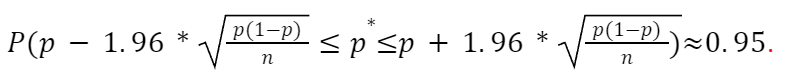

This sounds similar to what we understand about CIs, but not exactly the exact definition.

---

![image-2.png](attachment:image-2.png)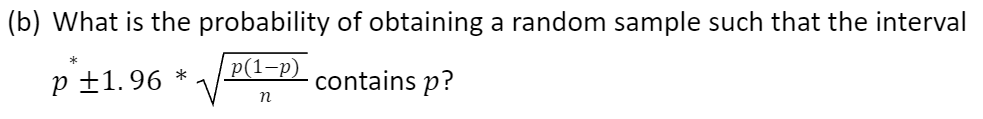

Note:
- $p*$ is the Sample Proportion and
- $p$ is the Population Proportion

Also note that we are constructing the CIs around the respective Sample Proportions ($p*$) using the Population Proportion (p). 

Not exactly what we learnt in the Lectures, but we are getting closer.

Answer:

We know from the previous part of this question that
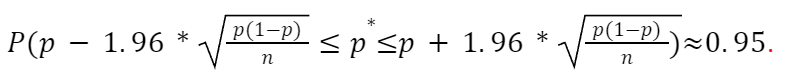

Where approximately 95% of the Sample Proportions lie within 1.96 standard deviations of the Population Proportion

But if we just apply algebraic manipulation, we can see that 
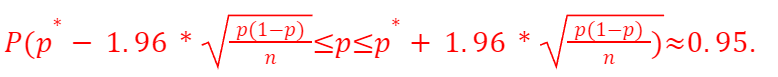

### Proof
Let $\sqrt{\frac{p(1-p)}{n}} = Var$

$p - 1.96(Var) \le p^*$

$-p^* -1.96(Var) \le -p$

$p^*+1.96(Var) \ge p$

$p \le p^*+1.96(Var)$

Same proof for the other half of the inequality

A reminder again that we are constructing the CIs around the respective Sample Proportions ($p*$) using the Population Proportion (p). 

Our aim is $p^* ± 1.96*\sqrt{\frac{p^*(1-p^*)}{n}}$

We are not there yet. 

---

### Questions 13 and 14

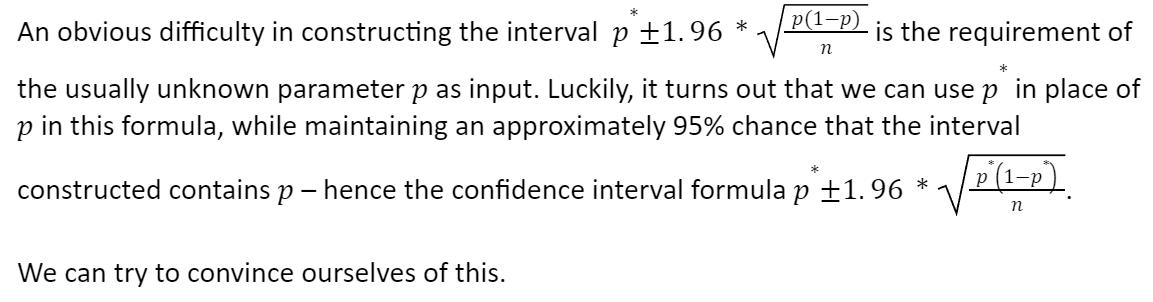

This is a proof by construction/simulation

What was done in the code

1. Constructed 95% Confidence Intervals for ALL 10000 random samples
2. Found out how many of these CIs contained the population proportion
3. Calculated the percentage of the CIs from point 2

In [ ]:
# I need to restart the prop_in count from ZERO (Not required to know why)
prop_in = 0

# I now also need to reinstantiate the pp_in_CI array (NOT required to know why)
pp_in_CI = logical(10000)

In [ ]:
for (i in 1:10000) { # Performing the same code 10000 times
    s = sample(trees[,"species_name"], 200) # random samples of size 200 from the trees dataframe
    number = sum(s == "Xanthostemon chrysanthus") # count the number of the specific flower
    arr_prop[i] = (number/200) # populate the arr_prop array with the proportions of the specific flower
    
    # This portion of the code relates to the Approximated Normal Distribution generated by the FULL Dataset
    if (arr_prop[i] >= left_end & arr_prop[i] <= right_end) { 
    # if the Sample proportion is between left and right bounds. ie it is within 95% of the Normal Distribution
    prop_in = prop_in + 1 
    # then add 1 to the COUNT
    # prop_in is basically the count of whether the sample proportion in IN or WITHIN the 95% of Normal Distribution
    } 
    
    # This portion of the code relates to the CIs created by EACH of the 10000 samples
    # The next line of code means that the absolute difference between the 
    # Sample proportion (p*) and the Population proportion (p) is less than
    # the error term of the Sample CI
    # Which means this line of code finds the samples 
    # where the population proportion is WITHIN the sample CI
    if (abs(arr_prop[i]-0.3) <= 1.96*sqrt((arr_prop[i]*(1-arr_prop[i]))/200)) { 
        # if array proportion minus 0.3 is less than 1.96*Sqrt((p)(1-p)/n)
        pp_in_CI[i] = TRUE #this just says that the population proportion is within the CI.
        # We want to find out what percentage of these sample CIs contain the pupulation proportion
    } 
} 

[1] Proportion of sample proportions within the given interval =  0.9488
[1] Proportion of Confidence Intervals containing the population proportion= 0.9471


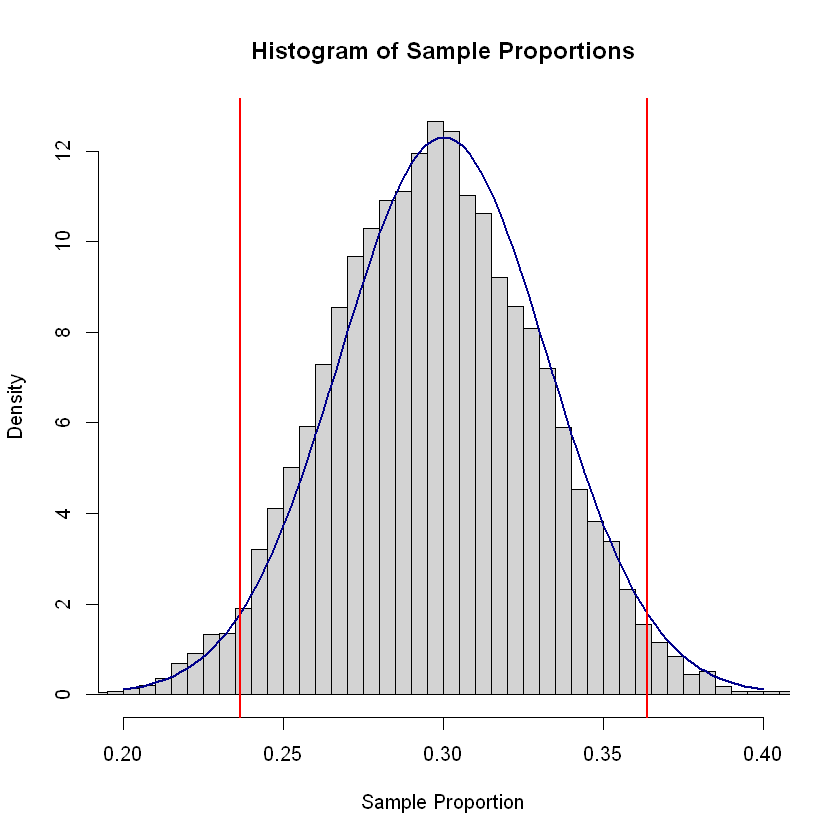

In [ ]:
hist(arr_prop,  # arr_prop is the choice for the plot
    main = "Histogram of Sample Proportions", # Title
    xlab = "Sample Proportion",  # X Label
    xlim = c(0.2, 0.4),  # X-axis bounds/limits
    breaks = seq(min(arr_prop), max(arr_prop), length.out = ((max(arr_prop)-min(arr_prop))*200)+1),  
     # number of breaks/bins
    freq=FALSE) 

# The appended code just adds a Normal Curve onto the original Density Plot
curve(dnorm(x, mean=0.3, sd=sd_sd),
           col="darkblue",
           lwd=2,
           add=TRUE)

# The new appended code just adds two vertical lines showing the boundaries
abline(v=left_end, col='red',lwd=2)

abline(v=right_end,col='red',lwd=2)

# Append the statement for Qn 11
print(paste("Proportion of sample proportions within the given interval = ", prop_in/10000), quote= FALSE)

# Append Question 13 Code
print(paste("Proportion of Confidence Intervals containing the population proportion=",
            sum(pp_in_CI)/10000),quote=FALSE)

#### We Have Shown that

 Proportion of Sample Proportions (p*) within the interval $p ± 1.96*\sqrt{\frac{p(1-p)}{n}}$ 
 
 $\approx$

Proportion of Confidence Intervals $p^* ± 1.96*\sqrt{\frac{p^*(1-p^*)}{n}}$ containing the Population Proportion (p)

In the report, you should see 
- the proportion of the 10000 confidence intervals containing the population proportion of 0.3. 
- Compare it with the proportion of sample proportions lying within the given interval $0.3±1.96*\sqrt{\frac{0.3(0.7)}{200}}$, also generated in the report. 

The two proportions should be similar as shown above.


### Question: Why is this Simulation reliable?

Because we took 10000 samples and showed that 

- Proportion of sample proportions within the given interval 
- Proportion of Confidence Intervals containing the population proportion

Both mean the same thing.

---

![image.png](attachment:image.png)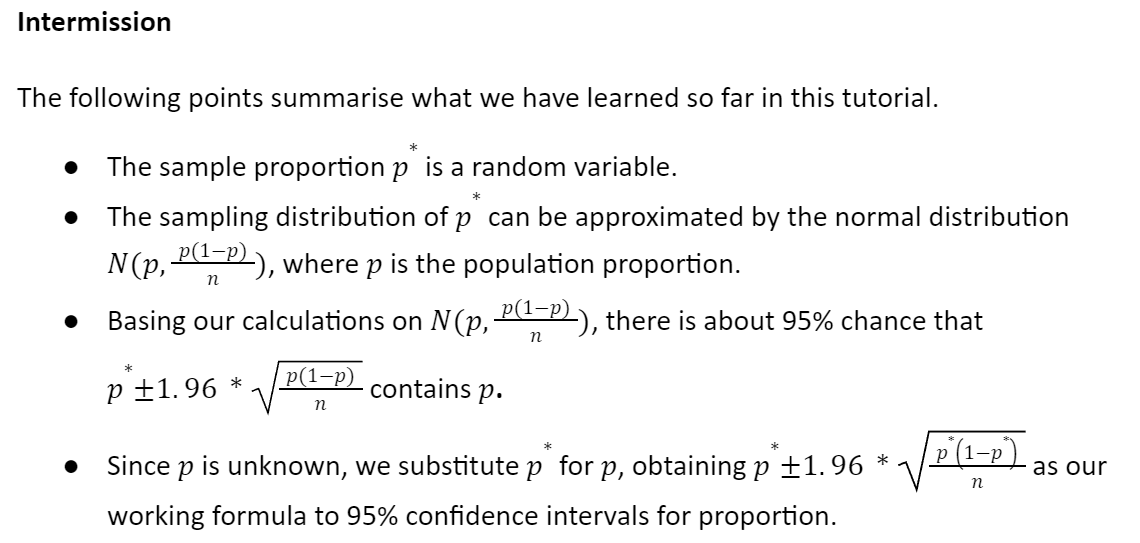

---

## Part 4: One-tailed hypothesis test for population proportions

Done on Radiant

---